# Exercise Anomaly Detection

Take the data from https://www.kaggle.com/mlg-ulb/creditcardfraud

Apply the LOF model (you can use same code than Live Coding), note that LOF doesn't train with Y set.

Then try to compare the results of the confussion Matrix against Logistic Regression and Random Forest, what are the difference in the results ?

## SOLUTION

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
new_style = {'grid': False}
plt.rc('axes', **new_style)

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split


In [21]:
def plot_confussion_matrix(matrix):
    df_confussion_matrix = pd.DataFrame(matrix,
                     ['True Normal','True Fraud'],
                     ['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sns.set(font_scale=1.4)
    plt.title('Confussion Matrix')
    _ = sns.heatmap(df_confussion_matrix, annot=True, annot_kws={"size": 16}, fmt='g')
    
def model_reporting(y_real, y_pred):
    confussion_matrix = metrics.confusion_matrix(y_real, y_pred)
    roc_auc = metrics.roc_auc_score(y_real, y_pred)
    metrica_f1 = metrics.f1_score(y_real, y_pred)
    print('\tAUC of ROC Curve is: {}'.format(round(roc_auc,2)))
    print('\tF1 Score: {}'.format(round(metrica_f1,2)))
    print("\tAccuracy: {}".format(round(metrics.accuracy_score(y_real, y_pred),3)))  
    print("\tSensitivity:{}".format(round(metrics.recall_score(y_real, y_pred),3)))
    print("\tPrecission: {}".format(round(metrics.precision_score(y_real, y_pred),3)))   
    plot_confussion_matrix(confussion_matrix)

## EDA & Pre-Processing

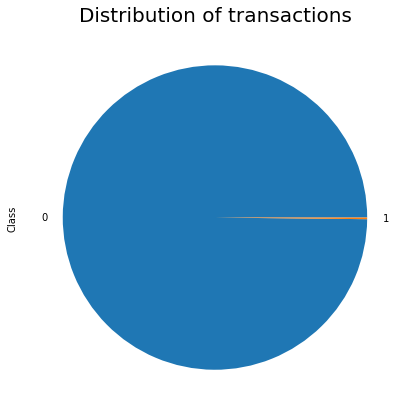

In [3]:
XY = pd.read_csv('creditcard.csv')

XY['Class'].value_counts().plot(kind='pie', figsize=(7,7))
_ = plt.title('Distribution of transactions', fontsize=20)

In [4]:
XY['Class'].value_counts()

X = XY.drop('Class', axis=1)
Y = XY['Class']

## LOF MODEL

In [5]:
%%time
clf=LocalOutlierFactor(n_neighbors=10, 
                        algorithm='auto', 
                        leaf_size=30,
                        metric='minkowski', 
                        p=2, 
                        metric_params=None, 
                        n_jobs=-1,
                        novelty=False)

clf.fit(X)

Wall time: 52min


LocalOutlierFactor(n_jobs=-1, n_neighbors=10)

	AUC of ROC Curve is: 0.67
	F1 Score: 0.06
	Accuracy: 0.98
	Sensitivity:0.358
	Precission: 0.031


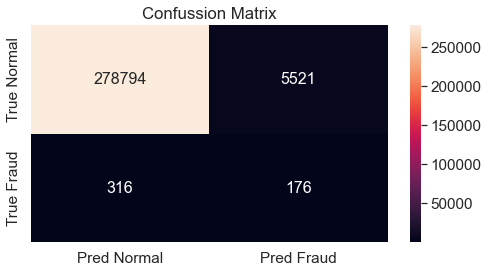

In [22]:
lof_factors = clf.negative_outlier_factor_
Y_pred_clase = lof_factors.copy()
Y_pred_clase[lof_factors>=np.percentile(lof_factors,2.)] = 0
Y_pred_clase[lof_factors<np.percentile(lof_factors,2.)] = 1
model_reporting(Y, Y_pred_clase) 

## Logistic Regression

In [27]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

	AUC of ROC Curve is: 0.81
	F1 Score: 0.73
	Accuracy: 0.999
	Sensitivity:0.626
	Precission: 0.88
Wall time: 14.4 s


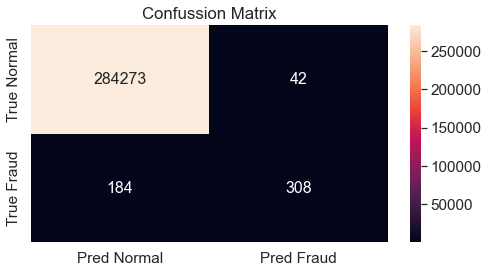

In [30]:
%%time
lgr_model = LogisticRegression(n_jobs = -1).fit(X_norm, Y)
y_pred_lgr = lgr_model.predict(X_norm)
model_reporting(Y, y_pred_lgr) 

# Random Forest

	AUC of ROC Curve is: 1.0
	F1 Score: 1.0
	Accuracy: 1.0
	Sensitivity:0.998
	Precission: 1.0
Wall time: 1min 22s


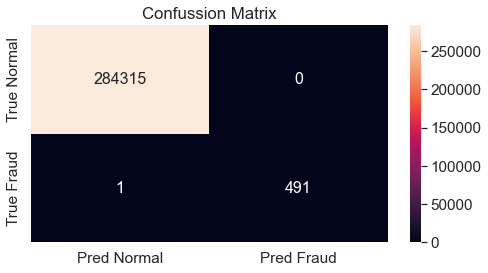

In [31]:
%%time
rf_model = RandomForestClassifier(n_jobs = -1).fit(X_norm, Y)
y_pred_rf = rf_model.predict(X_norm)
model_reporting(Y, y_pred_rf) 

As we can see, when we've labeled data supervised models works correctly but, in first phase we can find outliers with LOF and the use a supervised model to predict new data